<a href="https://colab.research.google.com/github/HazelZhaoo/Credit-card-fraud-detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
###  Project Background


**The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**



The questions I'm aiming to answer are :


1. Are the frauds time-sensitive?
2. Is there any relationship between the fraud transactions with the amount of money?
2. Build a ML model that can accurately classify frauds and legit transactions.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

Before we apply ML algothrims to predict the frauds , lets try to understand the data first.The dataset contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues, it does not provide the original features and more background information about the data.

 - Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

 - Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

 - Feature 'Amount' is the transaction Amount, it can be used for example-dependant cost-sensitive learning.

 - Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


The data has 284800 rows and 31 features.Now let's see if there are non-related values such as null in each column and if there is we'll further clean the data.

In [3]:
# check to see if there is null value
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As seen in the output , there are no null values so we can go ahead and do the exploratory data analysis to see what the data tell us.

EDA , lets try to understand the data. I'll plot a histogram of each column and a heatmap to see the correlations.




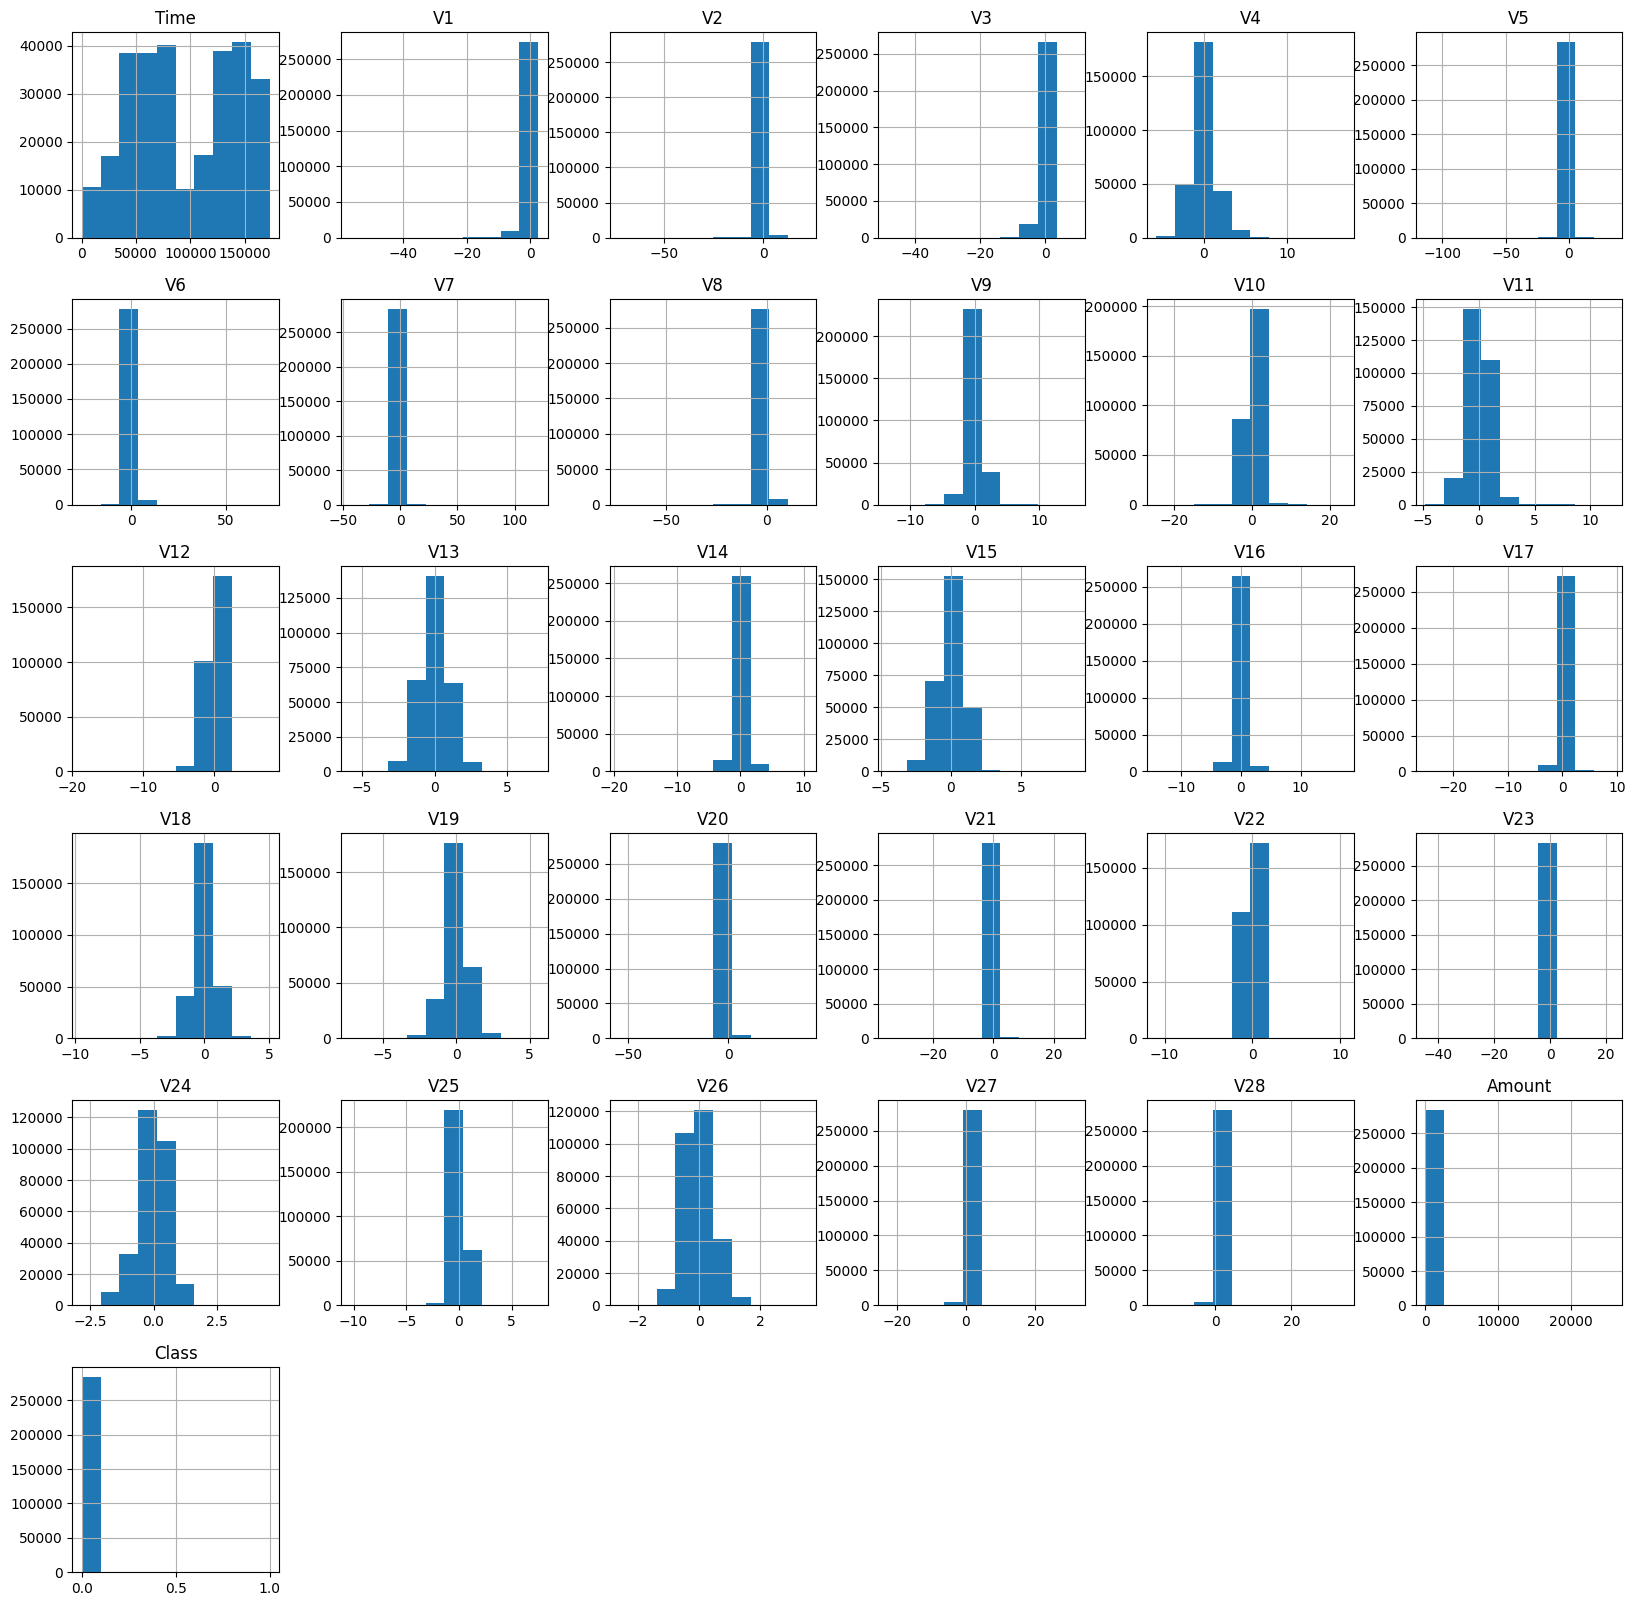

In [5]:
df.hist(figsize=(20,20))
plt.show()

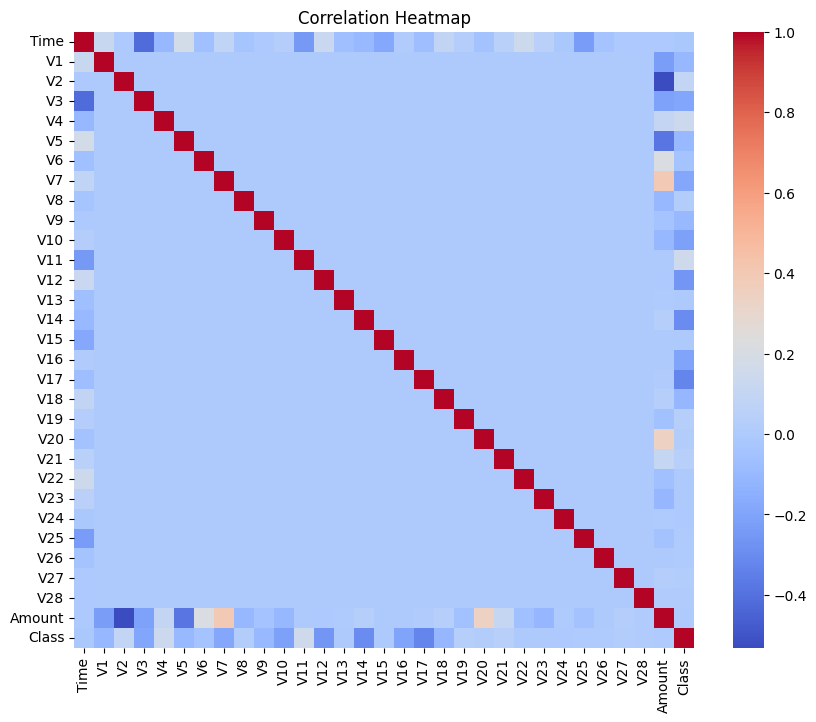

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm" )
plt.title("Correlation Heatmap")
plt.show()

**1. Are the frauds time sensitive?**

**2. Is there any relationship between the fraud transactions with the amount of money?**

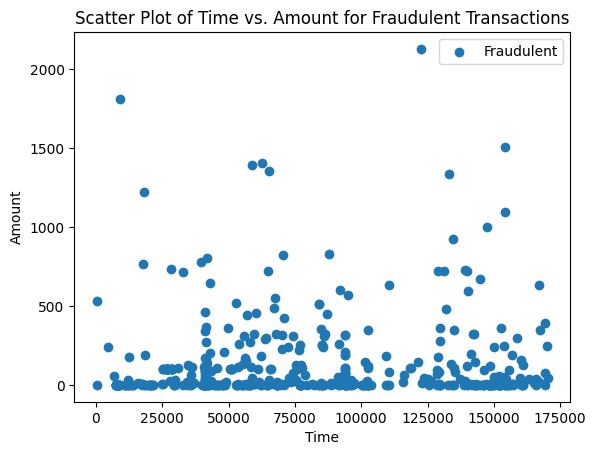

In [11]:
# Select the fraudulent transactions
fraud = df[df['Class'] == 1]

# Create a scatter plot of time vs. some other relevant feature (e.g., amount)
plt.scatter(fraud['Time'], fraud['Amount'] , label='Fraudulent')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter Plot of Time vs. Amount for Fraudulent Transactions')

# Show the plot
plt.legend()
plt.show()

Based on the scatter plot, we can conclude that fraudulent transactions are not time-sensitive and are generally distributed throughout all times of the day, with most of them having transaction amounts below 2000. The scatter plot indicates that there is no clear pattern or time-dependence for fraudulent transactions, as they are spread across various time points and do not seem to cluster at specific times. This is a valuable observation for your analysis.


**3.Build a ML model that can accurately classify frauds and legit transactions.**



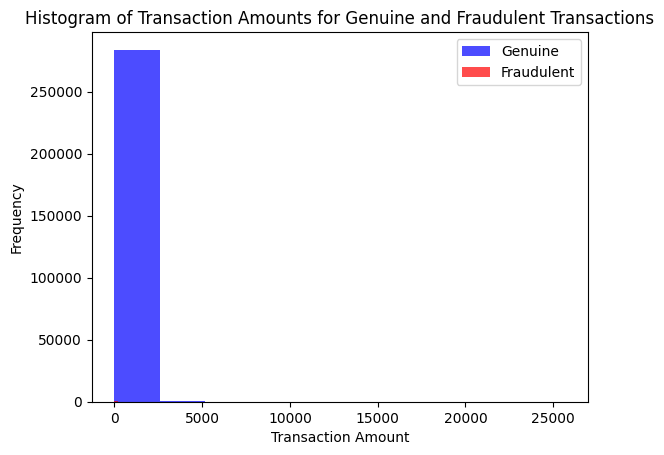

In [12]:
class_0_data = df[df['Class'] == 0]['Amount']
class_1_data = df[df['Class'] == 1]['Amount']

plt.hist(class_0_data, bins=10, alpha=0.7, label='Genuine', color='blue')
plt.hist(class_1_data, bins=10, alpha=0.7, label='Fraudulent', color='red')

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Transaction Amounts for Genuine and Fraudulent Transactions')
plt.show()


As seen in the plot , the dataset is highly imbalanced with the majority of the transaction in the '0' class and minority in the '1' class.
If we run a model in such imbalanced model , the result may end up highly overfitting on the data and resulting in non-deployable model.
we will perform Synthetic Minority Over-sampling Technique (SMOTE) on the data to balance it out.



In [13]:
X = df.drop('Class' , axis = 1)
Y = df['Class']

X_train , x_test , Y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state= 42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, Y_train)

We'll use logistic regression as our baseline model.

In [14]:
# Split the resampled data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a pipeline for Logistic Regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional: StandardScaler
    ('classifier', LogisticRegression())
])

# Train the Logistic Regression model using the pipeline
logistic_pipeline.fit(X_train, Y_train)

# Make predictions on the test data
logistic_predictions = logistic_pipeline.predict(X_test)

logistic_accuracy = accuracy_score(Y_test, logistic_predictions)
logistic_precision = precision_score(Y_test, logistic_predictions)
logistic_recall = recall_score(Y_test, logistic_predictions)
logistic_f1 = f1_score(Y_test, logistic_predictions)

print(logistic_accuracy)
print(logistic_precision)


0.9797540145744716
0.9919251445151713


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


This model is highly accurate but it runs the risk of overfittng , we'll do a k-fold validation at the end.Next , we'll use random forest for further classification

In [17]:
RF_pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('classifier' , RandomForestClassifier())
])

RF_pipeline.fit(X_train , Y_train)
RF_prediction = RF_pipeline.predict(X_test)

Random_forest_accuracy =  accuracy_score(Y_test , RF_prediction)
Random_forest_precision = precision_score(Y_test , RF_prediction)
Random_forest_recall = recall_score(Y_test , RF_prediction)
Random_forest_f1 = f1_score(Y_test , RF_prediction)

print(Random_forest_accuracy)
print(Random_forest_precision)

0.9999450434706147
0.9999122537621199


In [ ]:
from sklearn.model_selection import cross_val_score
k = 5
logistic_socre = cross_val_score(logistic_pipeline , X_resampled , y_resampled , cv = k , scoring = 'accuracy')
random_forest_score = cross_val_score(RF_pipeline , X_resampled , y_resampled , cv = k , scoring = 'accuracy')

print(logistic_socre)
print(random_forest_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c